## Sister Classification Model

* Model to classify between sisters
* Image data loaded into sisters directory


In [1]:
from fastbook import *

#### Loading data from sisters directory 

In [2]:
path = Path('sisters')
sister_types = 'darrigan','isabella'

In [3]:
fns = get_image_files(path)
fns

(#167) [Path('sisters/isabella/IMG_6684.jpeg'),Path('sisters/isabella/IMG_1974.JPG'),Path('sisters/isabella/IMG_1371.JPEG'),Path('sisters/isabella/IMG_6686.jpeg'),Path('sisters/isabella/IMG_5436.JPG'),Path('sisters/isabella/IMG_1376.JPEG'),Path('sisters/isabella/IMG_6682.jpeg'),Path('sisters/isabella/IMG_1157.JPEG'),Path('sisters/isabella/IMG_6055.JPG'),Path('sisters/isabella/IMG_1378.JPEG')...]

In [4]:
failed = verify_images(fns)
failed

(#0) []

In [5]:
failed.map(Path.unlink)

(#0) []

### Defining a data block, 

In [6]:
sisters = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = sisters.dataloaders(path)

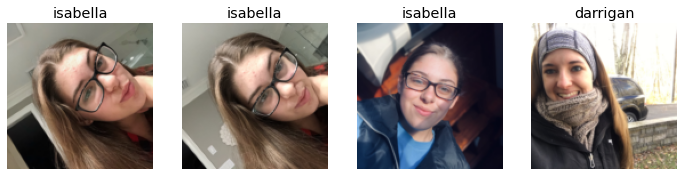

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

In [9]:
sisters = sisters.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                     batch_tfms=aug_transforms())
dls = sisters.dataloaders(path)

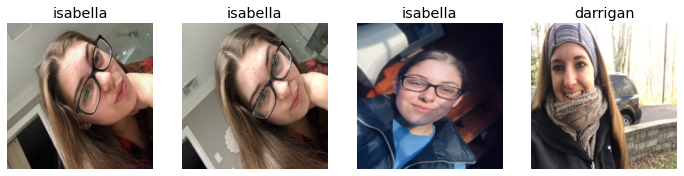

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.243296,1.712780,0.545455,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.754332,1.072391,0.393939,00:05
1,0.666516,0.535331,0.272727,00:05
2,0.549716,0.328055,0.181818,00:06
3,0.458432,0.236023,0.181818,00:06


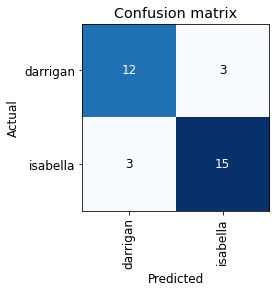

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

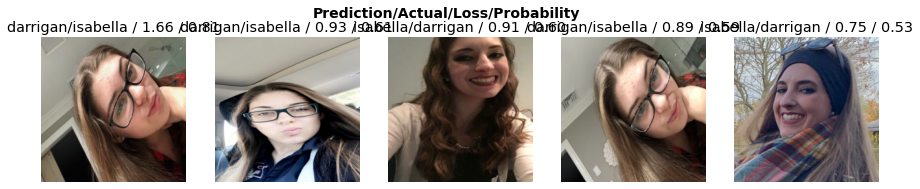

In [13]:
interp.plot_top_losses(5, nrows=1)

In [15]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [334]:
# for idx in cleaner.delete(): 
#     print('Deleting')
#     cleaner.fns[idx].unlink()

In [16]:
learn.export()

In [17]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('test_images/bella4.jpg')

('isabella', tensor(1), tensor([0.4251, 0.5749]))

In [30]:
learn_inf.dls.vocab

['darrigan', 'isabella']